In [1]:
%display latex

# Define stuff

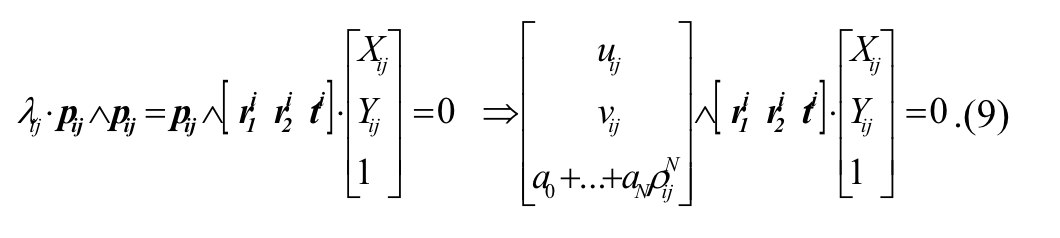

In [2]:
l = var("l", latex_name="\\lambda")

p = matrix(
    SR,
    [
        [var(f"r_{j}{i}" if i < 3 else f"t_{j}") for i in range(1, 4)]
        for j in range(1, 4)
    ],
)
p

[r_11 r_12  t_1]
[r_21 r_22  t_2]
[r_31 r_32  t_3]

In [3]:
u = vector([var("u"), var("v"), var("psif", latex_name=r"\psi(\rho)")])
u

(u, v, psif)

In [4]:
X = vector([var("X"), var("Y"), 1])
X

(X, Y, 1)

# General equations

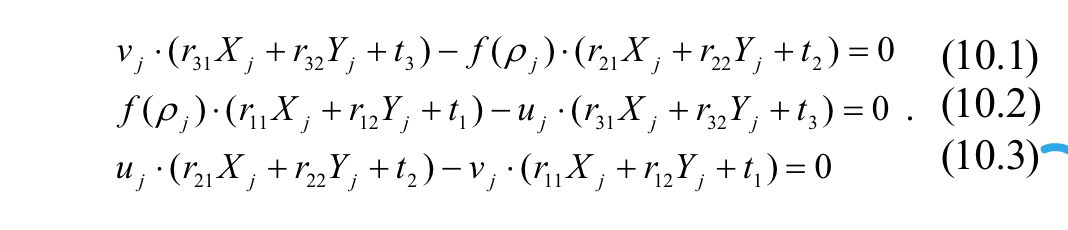

In [5]:
eqs = u.cross_product(p * X)
for el in eqs:
    display(el == 0)

-(X*r_21 + Y*r_22 + t_2)*psif + (X*r_31 + Y*r_32 + t_3)*v == 0

(X*r_11 + Y*r_12 + t_1)*psif - (X*r_31 + Y*r_32 + t_3)*u == 0

(X*r_21 + Y*r_22 + t_2)*u - (X*r_11 + Y*r_12 + t_1)*v == 0

In [6]:
l1, l2 = var("lambda1, lambda2")
eqs_ = eqs[:2].subs(var("psif") == 1 + l1 * norm(u[:2]) ** 2 + l2 * norm(u[:2]) ** 4)
for e in eqs_:
    display(e)

-((abs(u)^2 + abs(v)^2)^2*lambda2 + (abs(u)^2 + abs(v)^2)*lambda1 + 1)*(X*r_21 + Y*r_22 + t_2) + (X*r_31 + Y*r_32 + t_3)*v

((abs(u)^2 + abs(v)^2)^2*lambda2 + (abs(u)^2 + abs(v)^2)*lambda1 + 1)*(X*r_11 + Y*r_12 + t_1) - (X*r_31 + Y*r_32 + t_3)*u

In [7]:
solve(list(eqs_), t_2, l1, l2)

[[t_2 == -((X*r_21 + Y*r_22)*u - (X*r_11 + Y*r_12 + t_1)*v)/u, lambda1 == r1, lambda2 == -((X*r1*r_11 + Y*r1*r_12 + r1*t_1)*u^2 + (X*r1*r_11 + Y*r1*r_12 + r1*t_1)*v^2 + X*r_11 + Y*r_12 - (X*r_31 + Y*r_32 + t_3)*u + t_1)/((X*r_11 + Y*r_12 + t_1)*u^4 + 2*(X*r_11 + Y*r_12 + t_1)*u^2*v^2 + (X*r_11 + Y*r_12 + t_1)*v^4)]]

# Intrinsics

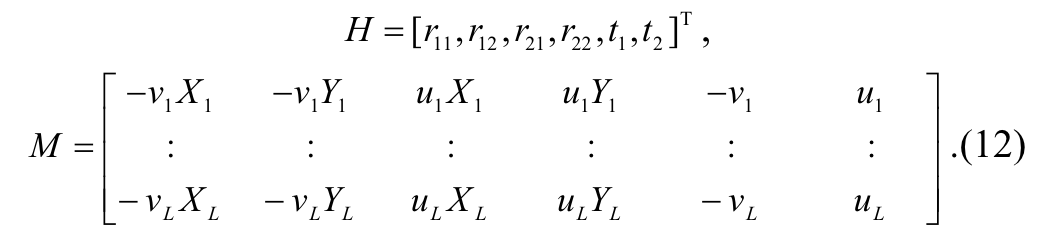

In [8]:
unknowns = p[:2, :2].list() + p[:2, 2].list()
unknowns

[r_11, r_12, r_21, r_22, t_1, t_2]

In julia, I have the following code (X is board coordinate system, x is image coordinates)

```julia
f(x, X) = [-x[2] * X[1], -x[2] * X[2], x[1] * X[1], x[1] * X[2], -x[2], x[1]]
```

In [9]:
[eqs[2].coefficient(unk) for unk in unknowns]

[-X*v, -Y*v, X*u, Y*u, -v, u]

In [10]:
for unk in unknowns:
    print(f"coef for {unk}: {eqs[2].coefficient(unk)}")

coef for r_11: -X*v
coef for r_12: -Y*v
coef for r_21: X*u
coef for r_22: Y*u
coef for t_1: -v
coef for t_2: u


Instead, in matlab code we have

```matlab
A=[Xt.*Ypt, Yt.*Ypt, -Xt.*Xpt, -Yt.*Xpt, Ypt, -Xpt];

%    [V,D]=eig(A'*A);
[U,S,V] = svd(A);

%Solving for computing the scale factor Lambda
R11=V(1,end);
R12=V(2,end);
R21=V(3,end);
R22=V(4,end);
T1=V(5,end);
T2=V(6,end);

```

## Find third element of orthonormal vectors

In [11]:
v1 = vector(p[:, 0]) * l
v2 = vector(p[:, 1]) * l

eqs = [v1 * v2 == 0, norm(v1) == 1, norm(v2) == 1]

eqs

[l^2*r_11*r_12 + l^2*r_21*r_22 + l^2*r_31*r_32 == 0,
 sqrt(abs(l*r_11)^2 + abs(l*r_21)^2 + abs(l*r_31)^2) == 1,
 sqrt(abs(l*r_12)^2 + abs(l*r_22)^2 + abs(l*r_32)^2) == 1]

In [12]:
assume(l, "real")
for el in p.list():
    for v in el.variables():
        assume(v, "real")

In [13]:
[eq.simplify_full() for eq in eqs]

[l^2*r_11*r_12 + l^2*r_21*r_22 + l^2*r_31*r_32 == 0,
 sqrt(l^2*r_11^2 + l^2*r_21^2 + l^2*r_31^2) == 1,
 sqrt(l^2*r_12^2 + l^2*r_22^2 + l^2*r_32^2) == 1]

In [14]:
print(eqs)

[l^2*r_11*r_12 + l^2*r_21*r_22 + l^2*r_31*r_32 == 0, sqrt((l^2*r_11^2) + (l^2*r_21^2) + (l^2*r_31^2)) == 1, sqrt((l^2*r_12^2) + (l^2*r_22^2) + (l^2*r_32^2)) == 1]


We set f1 and f2 to 1, since we could have incorporated it into H before.

In [15]:
eqs

[l^2*r_11*r_12 + l^2*r_21*r_22 + l^2*r_31*r_32 == 0,
 sqrt((l^2*r_11^2) + (l^2*r_21^2) + (l^2*r_31^2)) == 1,
 sqrt((l^2*r_12^2) + (l^2*r_22^2) + (l^2*r_32^2)) == 1]

In [16]:
solution = solve(eqs, [l, v1[2] / l, v2[2] / l])

In [17]:
len(solution)

8

In [18]:
# for i, sol in enumerate(solution, 1):
#     print('[')
#     for s in sol:
#         print(str(s.simplify_full().rhs()).replace('R_', 'r_').replace('sqrt', '√') + ',')
#     print('],')

### Scaramuzza way

#### Given equations

In [19]:
v1, v2

((l*r_11, l*r_21, l*r_31), (l*r_12, l*r_22, l*r_32))

In [20]:
eq1, eq2, eq3 = eqs

for e in (eq1, eq2, eq3):
    display(e)

l^2*r_11*r_12 + l^2*r_21*r_22 + l^2*r_31*r_32 == 0

sqrt((l^2*r_11^2) + (l^2*r_21^2) + (l^2*r_31^2)) == 1

sqrt((l^2*r_12^2) + (l^2*r_22^2) + (l^2*r_32^2)) == 1

#### Equation from the matlab code:

In [21]:
AA = (v1[0] * v2[0] + v1[1] * v2[1]) ^ 2
BB = v1[0] ^ 2 + v1[1] ^ 2
CC = v2[0] ^ 2 + v2[1] ^ 2

for e in (AA, BB, CC):
    display(e)

(l^2*r_11*r_12 + l^2*r_21*r_22)^2

l^2*r_11^2 + l^2*r_21^2

l^2*r_12^2 + l^2*r_22^2

In [22]:
scar_eq = 1 * v2[2] ^ 4 + (CC - BB) * v2[2] ^ 2 - AA == 0
scar_eq

l^4*r_32^4 - (l^2*r_11^2 - l^2*r_12^2 + l^2*r_21^2 - l^2*r_22^2)*l^2*r_32^2 - (l^2*r_11*r_12 + l^2*r_21*r_22)^2 == 0

## Derivation

In [23]:
sols = eq1.solve(v1[2] / l)
assert len(sols) == 1
sol = sols[0]
sol

r_31 == -(r_11*r_12 + r_21*r_22)/r_32

In [24]:
e1 = eq2.subs(sol)
e1

sqrt((r_11*r_12 + r_21*r_22)^2*l^2/r_32^2 + (l^2*r_11^2) + (l^2*r_21^2)) == 1

In [25]:
e1 ^ 2

(r_11*r_12 + r_21*r_22)^2*l^2/r_32^2 + (l^2*r_11^2) + (l^2*r_21^2) == 1

In [26]:
e2 = e1 ^ 2 - eq3 ^ 2
e2

(r_11*r_12 + r_21*r_22)^2*l^2/r_32^2 + (l^2*r_11^2) - (l^2*r_12^2) + (l^2*r_21^2) - (l^2*r_22^2) - (l^2*r_32^2) == 0

In [27]:
e3 = (e2 * v2[2] ^ 2).simplify_full()

In [28]:
assert e3 == -1 * scar_eq.expand().simplify_full()

In [29]:
for s in solve(e3, v2[2] / l):
    display(s ^ 2)
    display((sol.subs(s)).simplify_full())

r_32^2 == 1/2*r_11^2 - 1/2*r_12^2 + 1/2*r_21^2 - 1/2*r_22^2 + 1/2*sqrt(r_11^4 + 2*r_11^2*r_12^2 + r_12^4 + 2*r_11^2*r_21^2 - 2*r_12^2*r_21^2 + r_21^4 + 8*r_11*r_12*r_21*r_22 - 2*r_11^2*r_22^2 + 2*r_12^2*r_22^2 + 2*r_21^2*r_22^2 + r_22^4)

r_31 == (r_11*r_12 + r_21*r_22)/sqrt(1/2*r_11^2 - 1/2*r_12^2 + 1/2*r_21^2 - 1/2*r_22^2 + 1/2*sqrt(r_11^4 + 2*r_11^2*r_12^2 + r_12^4 + r_21^4 + 8*r_11*r_12*r_21*r_22 + r_22^4 + 2*(r_11^2 - r_12^2)*r_21^2 - 2*(r_11^2 - r_12^2 - r_21^2)*r_22^2))

r_32^2 == 1/2*r_11^2 - 1/2*r_12^2 + 1/2*r_21^2 - 1/2*r_22^2 + 1/2*sqrt(r_11^4 + 2*r_11^2*r_12^2 + r_12^4 + 2*r_11^2*r_21^2 - 2*r_12^2*r_21^2 + r_21^4 + 8*r_11*r_12*r_21*r_22 - 2*r_11^2*r_22^2 + 2*r_12^2*r_22^2 + 2*r_21^2*r_22^2 + r_22^4)

r_31 == -(r_11*r_12 + r_21*r_22)/sqrt(1/2*r_11^2 - 1/2*r_12^2 + 1/2*r_21^2 - 1/2*r_22^2 + 1/2*sqrt(r_11^4 + 2*r_11^2*r_12^2 + r_12^4 + r_21^4 + 8*r_11*r_12*r_21*r_22 + r_22^4 + 2*(r_11^2 - r_12^2)*r_21^2 - 2*(r_11^2 - r_12^2 - r_21^2)*r_22^2))

r_32^2 == 1/2*r_11^2 - 1/2*r_12^2 + 1/2*r_21^2 - 1/2*r_22^2 - 1/2*sqrt(r_11^4 + 2*r_11^2*r_12^2 + r_12^4 + 2*r_11^2*r_21^2 - 2*r_12^2*r_21^2 + r_21^4 + 8*r_11*r_12*r_21*r_22 - 2*r_11^2*r_22^2 + 2*r_12^2*r_22^2 + 2*r_21^2*r_22^2 + r_22^4)

r_31 == (r_11*r_12 + r_21*r_22)/sqrt(1/2*r_11^2 - 1/2*r_12^2 + 1/2*r_21^2 - 1/2*r_22^2 - 1/2*sqrt(r_11^4 + 2*r_11^2*r_12^2 + r_12^4 + r_21^4 + 8*r_11*r_12*r_21*r_22 + r_22^4 + 2*(r_11^2 - r_12^2)*r_21^2 - 2*(r_11^2 - r_12^2 - r_21^2)*r_22^2))

r_32^2 == 1/2*r_11^2 - 1/2*r_12^2 + 1/2*r_21^2 - 1/2*r_22^2 - 1/2*sqrt(r_11^4 + 2*r_11^2*r_12^2 + r_12^4 + 2*r_11^2*r_21^2 - 2*r_12^2*r_21^2 + r_21^4 + 8*r_11*r_12*r_21*r_22 - 2*r_11^2*r_22^2 + 2*r_12^2*r_22^2 + 2*r_21^2*r_22^2 + r_22^4)

r_31 == -(r_11*r_12 + r_21*r_22)/sqrt(1/2*r_11^2 - 1/2*r_12^2 + 1/2*r_21^2 - 1/2*r_22^2 - 1/2*sqrt(r_11^4 + 2*r_11^2*r_12^2 + r_12^4 + r_21^4 + 8*r_11*r_12*r_21*r_22 + r_22^4 + 2*(r_11^2 - r_12^2)*r_21^2 - 2*(r_11^2 - r_12^2 - r_21^2)*r_22^2))

In [30]:
for s in solve(e3, v2[2] / l):
    print(s ^ 2)

r_32^2 == 1/2*r_11^2 - 1/2*r_12^2 + 1/2*r_21^2 - 1/2*r_22^2 + 1/2*sqrt(r_11^4 + 2*r_11^2*r_12^2 + r_12^4 + 2*r_11^2*r_21^2 - 2*r_12^2*r_21^2 + r_21^4 + 8*r_11*r_12*r_21*r_22 - 2*r_11^2*r_22^2 + 2*r_12^2*r_22^2 + 2*r_21^2*r_22^2 + r_22^4)
r_32^2 == 1/2*r_11^2 - 1/2*r_12^2 + 1/2*r_21^2 - 1/2*r_22^2 + 1/2*sqrt(r_11^4 + 2*r_11^2*r_12^2 + r_12^4 + 2*r_11^2*r_21^2 - 2*r_12^2*r_21^2 + r_21^4 + 8*r_11*r_12*r_21*r_22 - 2*r_11^2*r_22^2 + 2*r_12^2*r_22^2 + 2*r_21^2*r_22^2 + r_22^4)
r_32^2 == 1/2*r_11^2 - 1/2*r_12^2 + 1/2*r_21^2 - 1/2*r_22^2 - 1/2*sqrt(r_11^4 + 2*r_11^2*r_12^2 + r_12^4 + 2*r_11^2*r_21^2 - 2*r_12^2*r_21^2 + r_21^4 + 8*r_11*r_12*r_21*r_22 - 2*r_11^2*r_22^2 + 2*r_12^2*r_22^2 + 2*r_21^2*r_22^2 + r_22^4)
r_32^2 == 1/2*r_11^2 - 1/2*r_12^2 + 1/2*r_21^2 - 1/2*r_22^2 - 1/2*sqrt(r_11^4 + 2*r_11^2*r_12^2 + r_12^4 + 2*r_11^2*r_21^2 - 2*r_12^2*r_21^2 + r_21^4 + 8*r_11*r_12*r_21*r_22 - 2*r_11^2*r_22^2 + 2*r_12^2*r_22^2 + 2*r_21^2*r_22^2 + r_22^4)


In [31]:
for s in solve(e3.subs(l == 1), v2[2] / l):
    print(s ^ 2)

r_32^2 == 1/2*r_11^2 - 1/2*r_12^2 + 1/2*r_21^2 - 1/2*r_22^2 + 1/2*sqrt(r_11^4 + 2*r_11^2*r_12^2 + r_12^4 + 2*r_11^2*r_21^2 - 2*r_12^2*r_21^2 + r_21^4 + 8*r_11*r_12*r_21*r_22 - 2*r_11^2*r_22^2 + 2*r_12^2*r_22^2 + 2*r_21^2*r_22^2 + r_22^4)
r_32^2 == 1/2*r_11^2 - 1/2*r_12^2 + 1/2*r_21^2 - 1/2*r_22^2 + 1/2*sqrt(r_11^4 + 2*r_11^2*r_12^2 + r_12^4 + 2*r_11^2*r_21^2 - 2*r_12^2*r_21^2 + r_21^4 + 8*r_11*r_12*r_21*r_22 - 2*r_11^2*r_22^2 + 2*r_12^2*r_22^2 + 2*r_21^2*r_22^2 + r_22^4)
r_32^2 == 1/2*r_11^2 - 1/2*r_12^2 + 1/2*r_21^2 - 1/2*r_22^2 - 1/2*sqrt(r_11^4 + 2*r_11^2*r_12^2 + r_12^4 + 2*r_11^2*r_21^2 - 2*r_12^2*r_21^2 + r_21^4 + 8*r_11*r_12*r_21*r_22 - 2*r_11^2*r_22^2 + 2*r_12^2*r_22^2 + 2*r_21^2*r_22^2 + r_22^4)
r_32^2 == 1/2*r_11^2 - 1/2*r_12^2 + 1/2*r_21^2 - 1/2*r_22^2 - 1/2*sqrt(r_11^4 + 2*r_11^2*r_12^2 + r_12^4 + 2*r_11^2*r_21^2 - 2*r_12^2*r_21^2 + r_21^4 + 8*r_11*r_12*r_21*r_22 - 2*r_11^2*r_22^2 + 2*r_12^2*r_22^2 + 2*r_21^2*r_22^2 + r_22^4)


In [32]:
eq1.solve(v1[2] / l)

[r_31 == -(r_11*r_12 + r_21*r_22)/r_32]

In [33]:
e1

sqrt((r_11*r_12 + r_21*r_22)^2*l^2/r_32^2 + (l^2*r_11^2) + (l^2*r_21^2)) == 1

In [34]:
e1

sqrt((r_11*r_12 + r_21*r_22)^2*l^2/r_32^2 + (l^2*r_11^2) + (l^2*r_21^2)) == 1